In [4]:
# Utilities
import re
import numpy as np
import pandas as pd

In [6]:
# Plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
# NLTK
from nltk.stem import WordNetLemmatizer

In [8]:
# SKLearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
# Importing the dataset

DATASET_COLUMNS = ['target', 'id', 'date', 'flag', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('projectData.csv', encoding = DATASET_ENCODING, names = DATASET_COLUMNS)
df.sample(5)

,target,id,date,flag,user,text
787426,0,2324894938,Thu Jun 25 04:17:57 PDT 2009,NO_QUERY,andybudd,Bit worried about my usability testing talk at...
557588,0,2204552532,Wed Jun 17 02:30:59 PDT 2009,NO_QUERY,Sumeet,@devakishor Offline since some-time and will b...
990954,4,1835056331,Mon May 18 05:01:01 PDT 2009,NO_QUERY,hollyalyxfinch,And then I got this one from the same guy on e...
502980,0,2187701297,Mon Jun 15 20:40:27 PDT 2009,NO_QUERY,tita4uf,@KainWarn cause we never talk anymore! come s...
536756,0,2198522634,Tue Jun 16 16:11:44 PDT 2009,NO_QUERY,CristalleLove,Still n da loaner car frowny face patiently w...


In [11]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [13]:
print('Length of the data is: ', len(df))

Length of the data is:  1600000


In [14]:
df.shape

(1600000, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [17]:
df.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [18]:
np.sum(df.isnull().any(axis = 1))

0

In [20]:
print('Count of columns in the data is: ', len(df.columns))
print('Count of rows in the data is: ', len(df))

Count of columns in the data is:  6
Count of rows in the data is:  1600000


In [21]:
df['target'].unique()

array([0, 4], dtype=int64)

In [23]:
df['target'].nunique()

2

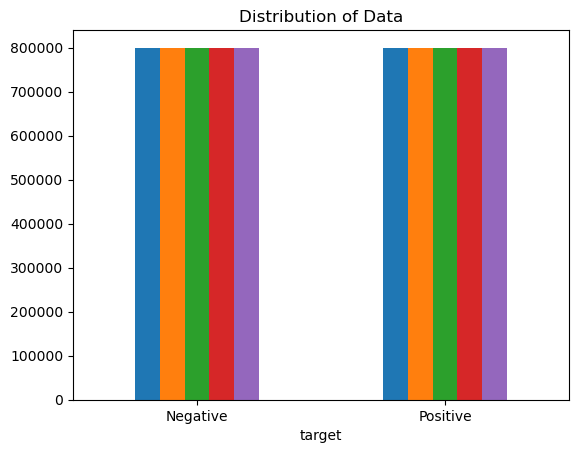

In [25]:
# Plotting the distribution of dataset

ax = df.groupby('target').count().plot(kind = 'bar', title = 'Distribution of Data', legend = False)
ax.set_xticklabels(['Negative', 'Positive'], rotation = 0)

# Storing data in Lists

text, sentiment = list(df['text']), list(df['target'])

# Saving the figure

plt.savefig('Distribution_of_Data', bbox_inches = 'tight')

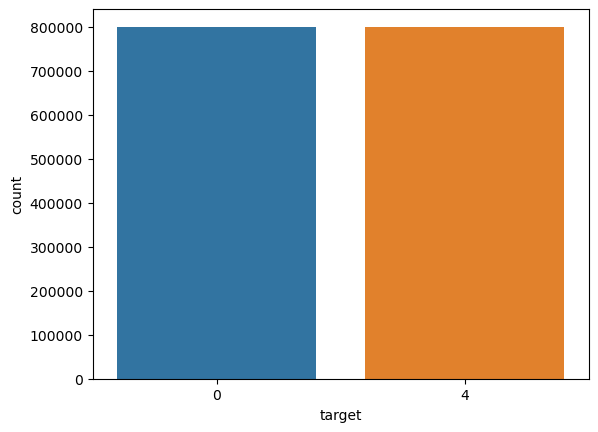

In [27]:
# Importing Seaborn
import seaborn as sns
sns.countplot(x = 'target', data = df)

# Save the figure
plt.savefig('target', bbox_inches = 'tight')

In [28]:
# Selecting the text and Target Column for our further analysis 
data = df[['text', 'target']]

# Replacing the values for easy understanding [Assigning 1 to positive sentiment 4]
data['target'] = data['target'].replace(4, 1)

# Print unique values of target variables
data['target'].unique()

C:\Users\iamfa\AppData\Local\Temp\ipykernel_19480\1073123856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4, 1)


array([0, 1], dtype=int64)

In [78]:
# Separating Positive and Negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [79]:
# Taking 1/4th data for easy processing
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

# Combining Positive and Negative tweets
dataset = pd.concat([data_pos, data_neg])

In [80]:
# Making all the text[tweets] in lowercase
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [81]:
# Defining set containg all the stopwords in English

stopwordList = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [82]:
# Cleaning and removing the above stopwords list from the tweets
STOPWORDS = set(stopwordList)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [83]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuation_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuation_list)
    return text.translate(translator)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [84]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [85]:
# Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [86]:
# Cleaning and removing Numeric numbers
def cleaning_Numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_Numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [87]:
# Getting Tokenization of the tweet texts [converting text into individual words]
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [88]:
dataset['text'].tail()

19995    [not, much, time, off, weekend, work, trip, ma...
19996                                 [one, day, holidays]
19997                [feeling, right, hate, damn, humprey]
19998    [geezi, hv, read, whole, book, personality, ty...
19999    [threw, sign, donnie, bent, over, get, but, th...
Name: text, dtype: object

In [89]:
# Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [90]:
# Applying Lemmatizer
import nltk

# Added inline methods to download the required plugins which are not bundles with NLTK anymore

nltk.download('wordnet')

nltk.download('omw-1.4')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iamfa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\iamfa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [102]:
# Separating Input features and labels
X = data.text
y = data.target

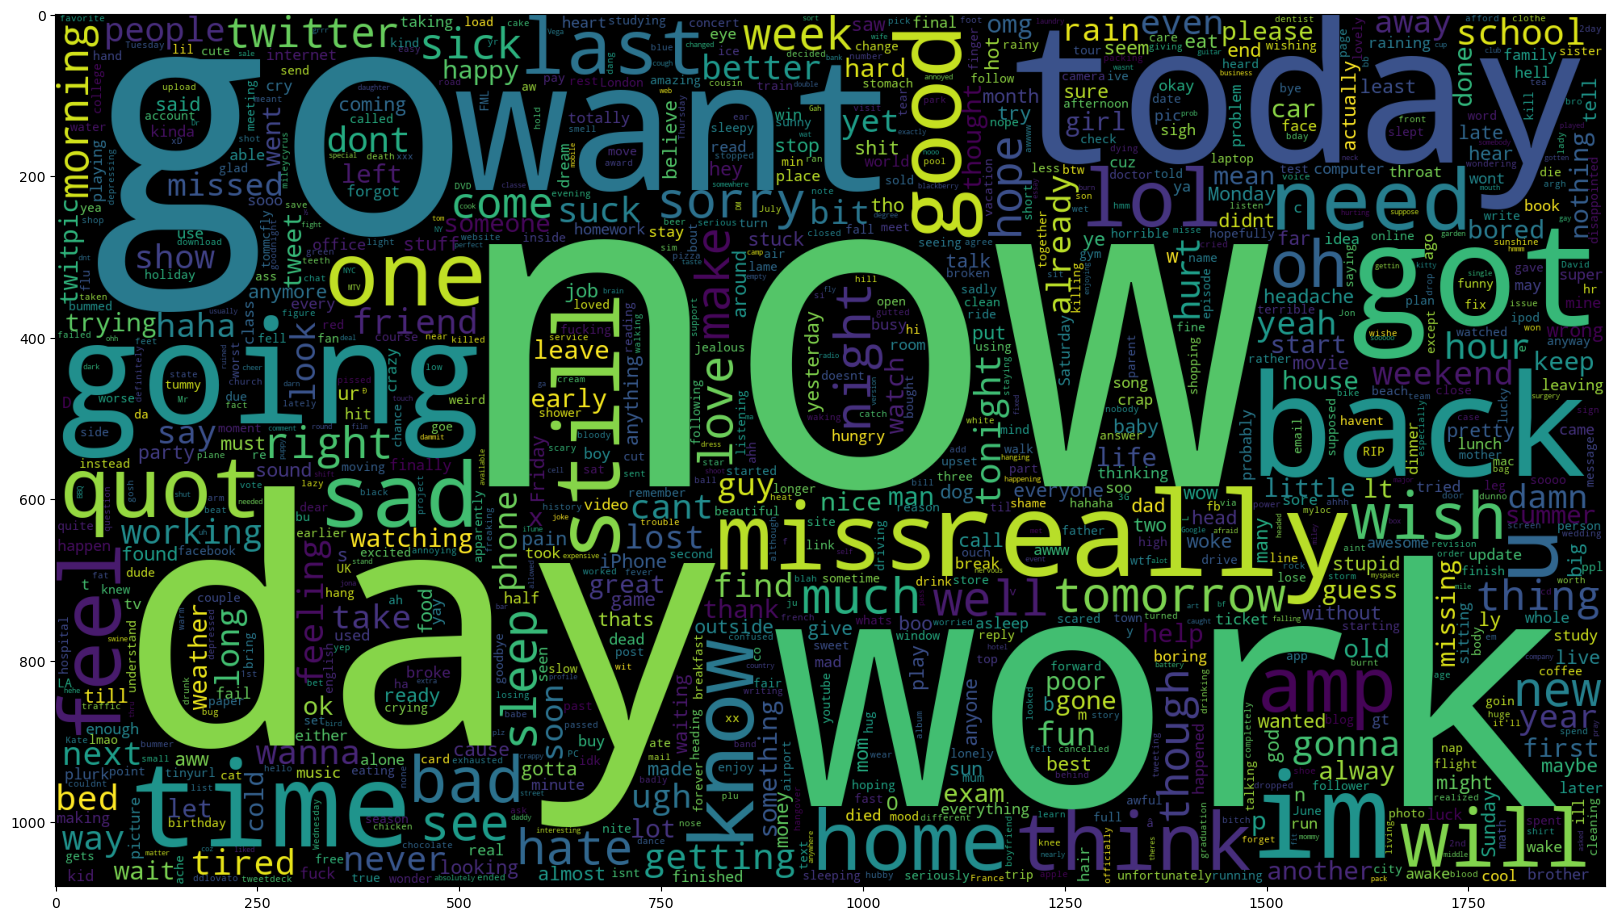

In [92]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000, width = 1920, height = 1080, collocations = False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.savefig('Negative_Tweets_WordCloud')

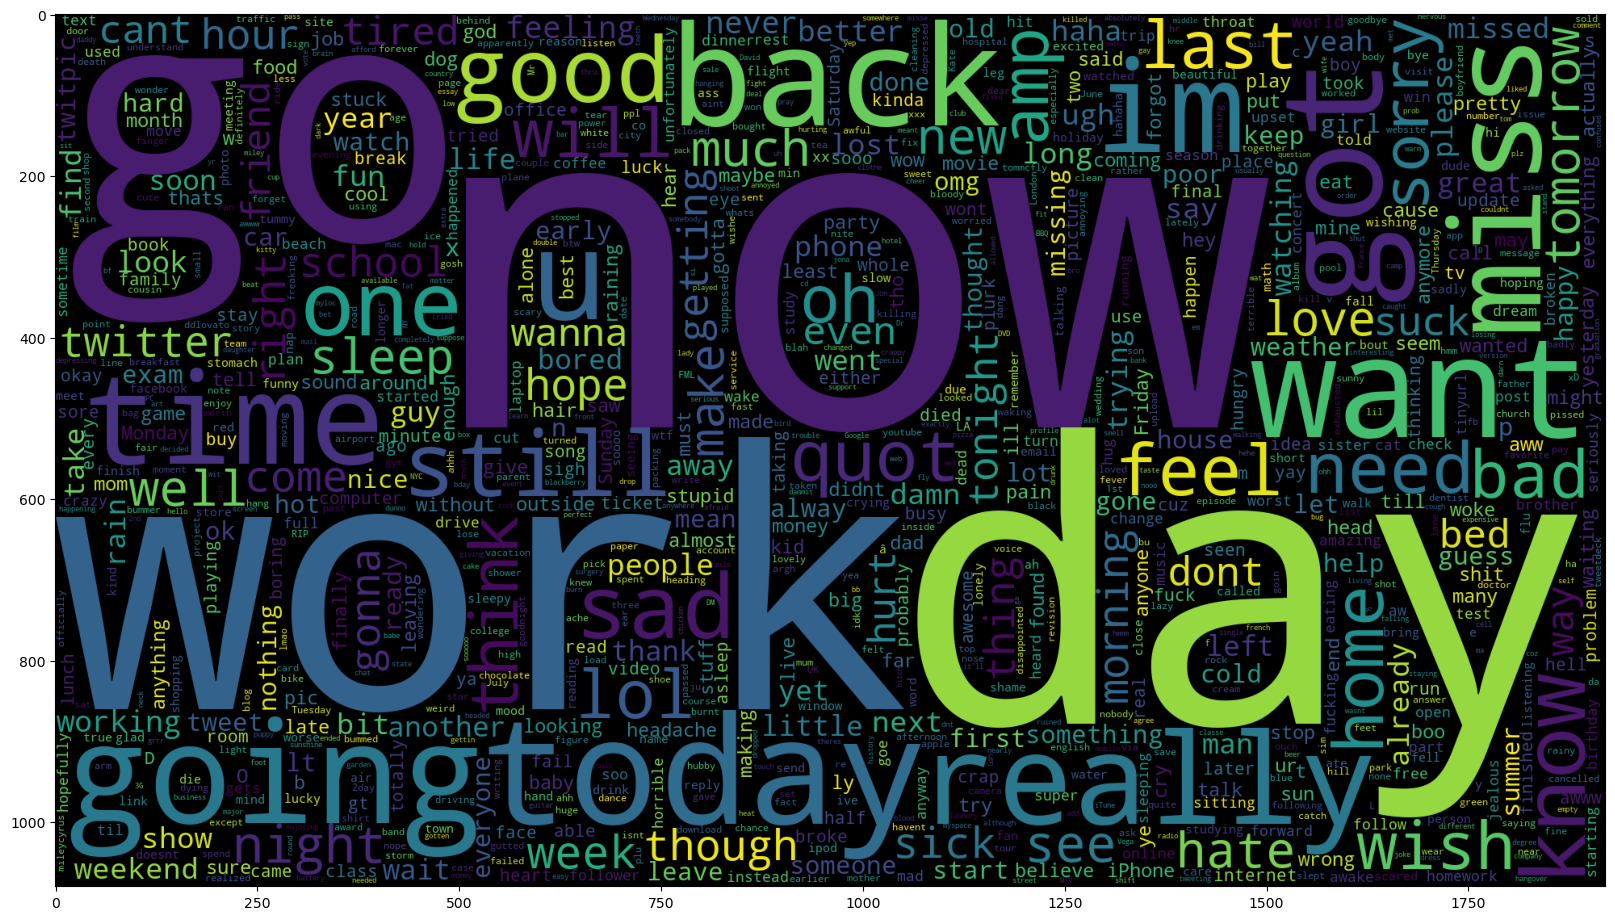

In [93]:
data_pos = data['text'][800000:]
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000, width = 1920, height = 1080, collocations = False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.savefig('Positive_Tweets_WordCloud')

In [114]:
# Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 26105111)

In [115]:
#Transforming Dataset using TF-IDF Vectorizer [Fit the dataset]
vectoriser = TfidfVectorizer(ngram_range = (1, 2), max_features = 500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [116]:
# Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [129]:
# Function for Model Evaluation
## After training the model we apply the evaluation measures to check how the model is performing
## Accordingly, we use the following evaluation parameters to check the performance
## of the models respectively.

## 1. Accuracy Score
## 2. Confusion Matrix with Plot
## 3. ROC-AUC Curve

def model_Evaluate(model):
    
    # Predict values for test data
    
    y_pred = model.predict(X_test)
    
    
    # Print the evaluation metrics for the dataset
    
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion Matrix
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues', fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size' : 14}, labelpad = 10)
    plt.ylabel("Actual values", fontdict = {'size' : 14}, labelpad = 10)
    plt.title("Confusion Matrix", fontdict = {'size' : 18}, pad = 20)
    plt.savefig('Confusion Matrix', dpi = 300)
    

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



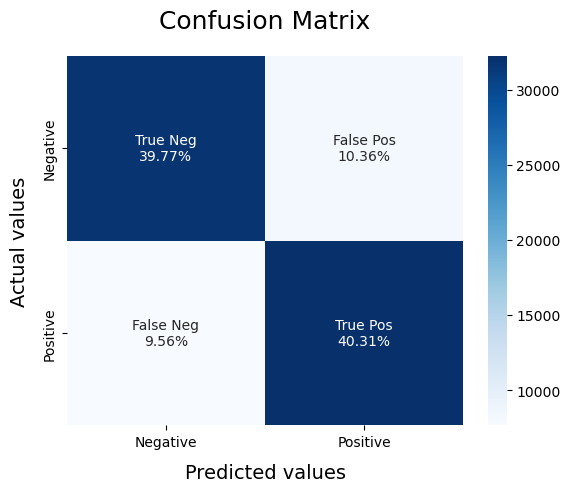

In [130]:
# Model Building [3 Models to choose from] [Classifier Models]

## 1. Bernoulli Naive Bayes
## 2. SVM [Support Vector Machine]
## 3. Logistic Regression

# Model 1 [Bernoulli Naive Bayes]

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

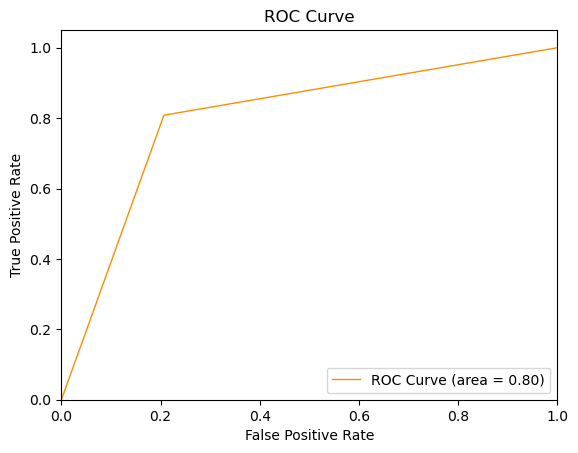

<Figure size 640x480 with 0 Axes>

In [131]:
# Plotting the ROC-AUC Curve for model 1 [Bernoulli Naive Bayes]

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 1, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
figure_ROC = plt.gcf()
plt.show()
plt.draw()
figure_ROC.savefig('ROC_Curve_for_BNB', dpi = 300)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



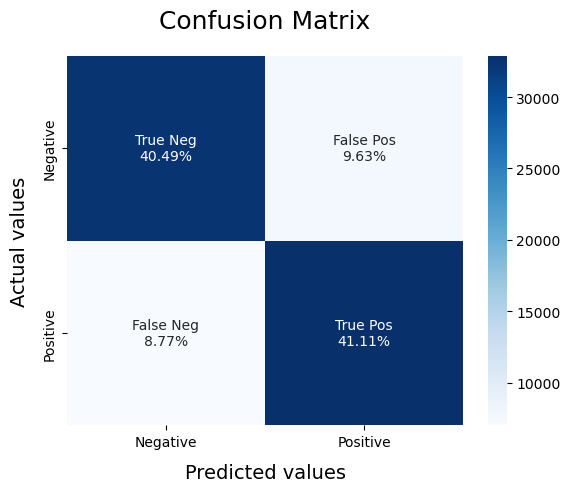

In [132]:
# Using the Second Model [Support Vector Classifier]
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

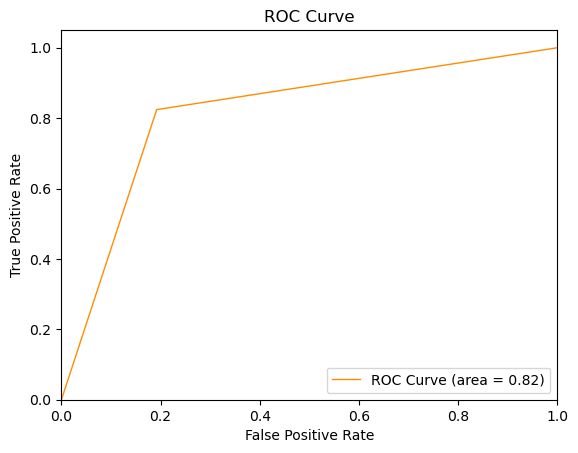

<Figure size 640x480 with 0 Axes>

In [133]:
# ROC Curve for Model 2 [Support Vector Classifier]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 1, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
figure_ROC = plt.gcf()
plt.show()
plt.draw()
figure_ROC.savefig('ROC_Curve_for_SVC', dpi = 300)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



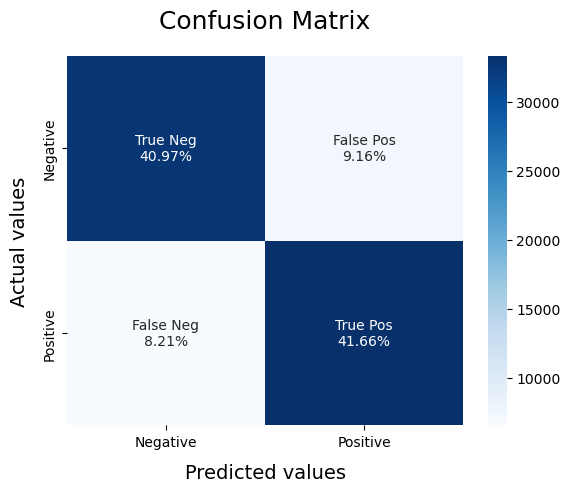

In [134]:
# Using Model 3 for our data [Logistic Regression]
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs = -1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

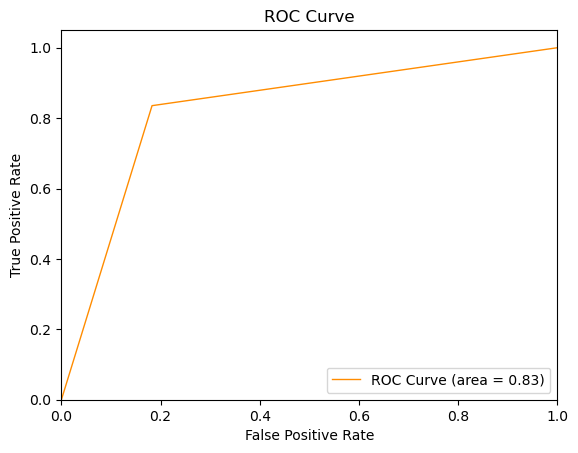

<Figure size 640x480 with 0 Axes>

In [135]:
# ROC Curve for Model 3 [Logistic Regression]

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 1, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
figure_ROC = plt.gcf()
plt.show()
plt.draw()
figure_ROC.savefig('ROC_Curve_for_LC', dpi = 300)

In [ ]:
# Conclusion

## Accuracy : Logistic Regression performs the best on the given dataset than the other two models.

## F1-score: The F1 Scores for class 0 and class 1 are :
# (a) For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)
# (b) For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

# AUC Score: All three models have the same ROC-AUC score.

# In Conclusion, Logistic Regression is the best model for the above-given dataset.
